## ETS Data Mining A

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
ETS=pd.read_csv("data.csv")
print(ETS.shape)
ETS.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [42]:
#Mengecek type data pada setiap variabel
ETS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [43]:
#Mengecek jumlah data pada setiap variabel
ETS.count().sort_values()

Product_Category_3            166821
Product_Category_2            376430
User_ID                       550068
Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
City_Category                 550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category_1            550068
Purchase                      550068
dtype: int64

## Mendeteksi Missing Value

In [44]:
#Mengecek Missing data dalam bentuk tabel
a=np.sum(ETS.isnull())
a=pd.DataFrame(a,columns=['a'])
b=pd.DataFrame([])
a=a.values
b['Variabel']=list(ETS)
b['Jumlah Missing']=a
b

,Variabel,Jumlah Missing
0,User_ID,0
1,Product_ID,0
2,Gender,0
3,Age,0
4,Occupation,0
5,City_Category,0
6,Stay_In_Current_City_Years,0
7,Marital_Status,0
8,Product_Category_1,0
9,Product_Category_2,173638


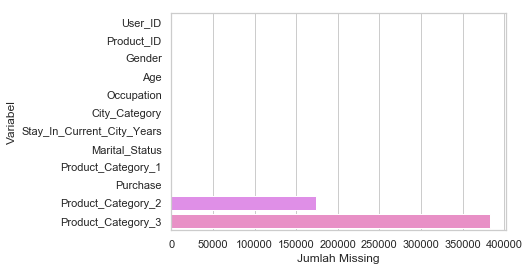

In [45]:
#Plot Missing Value
sns.set(style="whitegrid")
bsort=b.sort_values('Jumlah Missing')
ax = sns.barplot(x="Jumlah Missing", y="Variabel", data=bsort)
plt.show()

In [46]:
#Mengatasi missing value ada data numerik menggunakan mean
ETS['Product_Category_2']= ETS['Product_Category_2'].fillna(ETS['Product_Category_2'].mean())
ETS['Product_Category_3']= ETS['Product_Category_3'].fillna(ETS['Product_Category_3'].mean())

In [47]:
#Pengecekan kembali missing value
a=np.sum(ETS.isnull())
a=pd.DataFrame(a,columns=['a'])
b=pd.DataFrame([])
a=a.values
b['Variabel']=list(ETS)
b['Jumlah Missing']=a
b

,Variabel,Jumlah Missing
0,User_ID,0
1,Product_ID,0
2,Gender,0
3,Age,0
4,Occupation,0
5,City_Category,0
6,Stay_In_Current_City_Years,0
7,Marital_Status,0
8,Product_Category_1,0
9,Product_Category_2,0


In [48]:
#Statistika Deskriptif
ETS.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.207852,2.271830,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,12.668243,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.842329,12.668243,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12.668243,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Mendeteksi Missing Value dan Outlier

In [49]:
ETS1=pd.read_csv("data.csv")
#Mengatasi missing value ada data numerik menggunakan mean
ETS1['Product_Category_2']= ETS1['Product_Category_2'].fillna(ETS1['Product_Category_2'].mean())
ETS1['Product_Category_3']= ETS1['Product_Category_3'].fillna(ETS1['Product_Category_3'].mean())
np.sum(ETS1.isnull())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [50]:
from scipy import stats
z = np.abs(stats.zscore(ETS1._get_numeric_data()))
print(z)

ETS1=ETS1[(z<3).all(axis=1)]
print(ETS1.shape)

[[1.75263944e+00 2.94863556e-01 8.33017987e-01 ... 4.22153275e-16
  7.81906541e-16 1.77972902e-01]
 [1.75263944e+00 2.94863556e-01 8.33017987e-01 ... 9.13134028e-01
  5.86205048e-01 1.18175580e+00]
 [1.75263944e+00 2.94863556e-01 8.33017987e-01 ... 4.22153275e-16
  7.81906541e-16 1.56119326e+00]
 ...
 [1.74066623e+00 1.06142262e+00 1.20045427e+00 ... 4.22153275e-16
  7.81906541e-16 1.81701338e+00]
 [1.74182391e+00 1.08494277e+00 8.33017987e-01 ... 4.22153275e-16
  7.81906541e-16 1.77162273e+00]
 [1.74240275e+00 1.23825458e+00 1.20045427e+00 ... 4.22153275e-16
  7.81906541e-16 1.74673750e+00]]
(523644, 12)


In [74]:
#Statistika Deskriptif
ETS1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.236440e+05,523644.000000,523644.000000,523644.000000,523644.000000,523644.000000,523644.000000
mean,1.003029e+06,8.074675,0.410265,5.345809,10.093351,12.954539,9274.909734
std,1.727131e+03,6.527142,0.491882,3.637915,4.096234,1.758017,4975.999751
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,6.000000,185.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,12.668243,5854.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.842329,12.668243,8028.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12.668243,12020.000000
max,1.006040e+06,20.000000,1.000000,17.000000,18.000000,18.000000,23961.000000


## Mendeteksi Missing Value dan Transformasi

In [53]:
ETS2=pd.read_csv("data.csv")
#Mengatasi missing value ada data numerik menggunakan mean
ETS2['Product_Category_2']= ETS2['Product_Category_2'].fillna(ETS2['Product_Category_2'].mean())
ETS2['Product_Category_3']= ETS2['Product_Category_3'].fillna(ETS2['Product_Category_3'].mean())
np.sum(ETS2.isnull())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [54]:
ETS2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.000000,12.668243,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.000000,17.000000,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.000000,12.668243,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.000000,12.668243,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,9.842329,12.668243,7871


In [64]:
#Transformasi Variabel Kategorik
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
aa=le.fit(ETS2.iloc[0:,3])
a=le.transform(ETS2.iloc[0:,3])
bb=le.fit(ETS2.iloc[0:,6])
b=le.transform(ETS2.iloc[0:,6])
cc=le.fit(ETS2.iloc[0:,2])
c=le.transform(ETS2.iloc[0:,2])
dd=le.fit(ETS2.iloc[0:,5])
d=le.transform(ETS2.iloc[0:,5])

ETS2['Age']=a
ETS2['Stay_In_Current_City_Years']=b
ETS2['Gender']=c
ETS2['City_Category']=d
ETS2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.842329,12.668243,7969


In [70]:
#Transformasi Variabel Count
from sklearn import preprocessing
aa = ETS2.drop(columns=['User_ID','Product_ID','Age','Stay_In_Current_City_Years','Gender','City_Category'])
bb=ETS2[['User_ID','Product_ID','Age','Stay_In_Current_City_Years','Gender','City_Category']]
scaler = preprocessing.MinMaxScaler()
scaler.fit(aa)
aa = pd.DataFrame(scaler.transform(aa), index=aa.index, columns=aa.columns)
ETS3=pd.concat([aa,bb],axis=1)
print(ETS3.shape)
ETS3.head()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(550068, 12)


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID,Product_ID,Age,Stay_In_Current_City_Years,Gender,City_Category
0,0.5,0.0,0.105263,0.490146,0.644550,0.348992,1000001,P00069042,0,2,0,0
1,0.5,0.0,0.000000,0.250000,0.733333,0.634181,1000001,P00248942,0,2,0,0
2,0.5,0.0,0.578947,0.490146,0.644550,0.058875,1000001,P00087842,0,2,0,0
3,0.5,0.0,0.578947,0.750000,0.644550,0.043634,1000001,P00085442,0,2,0,0
4,0.8,0.0,0.368421,0.490146,0.644550,0.332248,1000002,P00285442,6,4,1,2


In [72]:
#Statistika Deskriptif
ETS2.describe()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,0.753105,2.496430,8.076707,1.042640,1.858418,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,4.207852,2.271830,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,12.668243,5823.000000
50%,1.003077e+06,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,9.842329,12.668243,8047.000000
75%,1.004478e+06,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,12.668243,12054.000000
max,1.006040e+06,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000
